In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage


Populating the interactive namespace from numpy and matplotlib


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print(geolon_t.shape)

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print(st_ocean.shape)
print(potrho.shape)
print(yt_ocean.shape)

nc = Dataset('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output200/ocean.nc', mode='r') # file handle, open in read only mode
dzt = nc.variables['dzt'][0,:,:,:]
nc.close() # close the file


(1080, 1440)
(50,)
(80,)
(1080,)


In [3]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

In [4]:
Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean_bgc_carbon*.nc')
print(Ocean_File)
nonp_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(nonp_cntrl.o2.shape)

Ocean_File = os.path.join(NYFPertDir,'output*/ocean_bgc_carbon*.nc')
nonp_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(nonp_pert.o2.shape)

/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/output*/ocean_bgc_carbon*.nc
(588, 50, 1080, 1440)
(528, 50, 1080, 1440)


1497.5618896484375


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2474.04296875


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3508.633056640625


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4555.56591796875


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


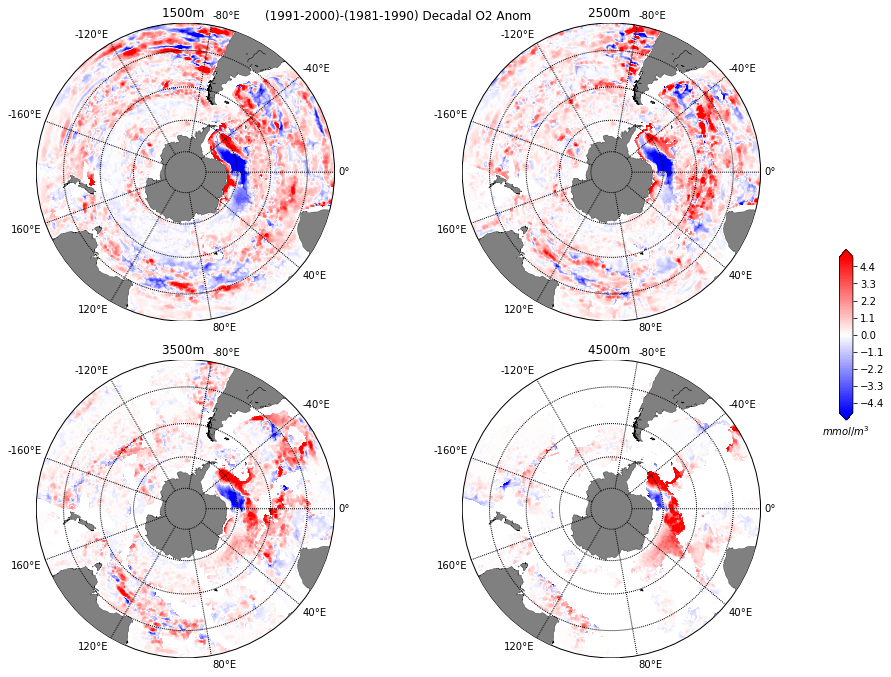

In [10]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal O2 Anom')

clev = np.arange(-5,5.1,.1)
#print clev

st=30
print(st_ocean[st])

var1=nonp_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[10*12:20*12,st,0:500,:].mean('Time').load()
var2=nonp_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[20*12:30*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m ')


st=35
print(st_ocean[st])
var1=nonp_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[10*12:20*12,st,0:500,:].mean('Time').load()
var2=nonp_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[20*12:30*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2500m ')

st=40
print(st_ocean[st])
var1=nonp_pert.o2[8*12:12*18,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[10*12:20*12,st,0:500,:].mean('Time').load()
var2=nonp_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[20*12:30*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('3500m ')

st=45
print(st_ocean[st])
var1=nonp_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[10*12:20*12,st,0:500,:].mean('Time').load()
var2=nonp_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-nonp_cntrl.o2[20*12:30*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4500m ')

ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$mmol/m^3$')

plt.tight_layout()


In [ ]:
#depth average between 1000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 1000-4000 and 4000:

print(st_ocean[27:43])
print(st_ocean[43:50])


print(nonp_pert.o2.shape)
nonp_pO_0to1=np.zeros((nonp_pert.o2.shape[0],nonp_pert.o2.shape[2],nonp_pert.o2.shape[3]))
nonp_pO_1to4=np.zeros((nonp_pert.o2.shape[0],nonp_pert.o2.shape[2],nonp_pert.o2.shape[3]))
nonp_pO_4to6=np.zeros((nonp_pert.o2.shape[0],nonp_pert.o2.shape[2],nonp_pert.o2.shape[3]))
print(nonp_pO_1to4.shape)

for t in range(nonp_pert.o2.shape[0]):
    print(t)
    
    nonp_pO_0to1[t,:,:]=np.sum(nonp_pert.o2[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
    nonp_pO_1to4[t,:,:]=np.sum(nonp_pert.o2[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
    nonp_pO_4to6[t,:,:]=np.sum(nonp_pert.o2[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/','pO_0to1.npy')
a=np.save(of,nonp_pO_0to1)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/','pO_1to4.npy')
a=np.save(of,nonp_pO_1to4)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/','pO_4to6.npy')
a=np.save(of,nonp_pO_4to6)





In [6]:
print(nonp_cntrl.o2.shape)
#nonp_cO_0to1=np.zeros((nonp_cntrl.o2.shape[0],nonp_cntrl.o2.shape[2],nonp_cntrl.o2.shape[3]))
#nonp_cO_1to4=np.zeros((nonp_cntrl.o2.shape[0],nonp_cntrl.o2.shape[2],nonp_cntrl.o2.shape[3]))
nonp_cO_4to6=np.zeros((nonp_cntrl.o2.shape[0],nonp_cntrl.o2.shape[2],nonp_cntrl.o2.shape[3]))
#print(nonp_cO_0to1.shape)

for t in range(nonp_cntrl.o2.shape[0]): #nonp_cntrl.o2.shape[0]):
    print(t)
    
    #if(t==4): #deal wit corrupt t==4 file
    #    nonp_cT_0to1[t,:,:]=np.sum(nonp_cntrl.o2[t-1,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
    #    nonp_cT_1to4[t,:,:]=np.sum(nonp_cntrl.o2[t-1,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
    #    nonp_cT_4to6[t,:,:]=np.sum(nonp_cntrl.o2[t-1,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    #else:
    #nonp_cO_0to1[t,:,:]=np.sum(nonp_cntrl.o2[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
    #nonp_cO_1to4[t,:,:]=np.sum(nonp_cntrl.o2[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
    nonp_cO_4to6[t,:,:]=np.sum(nonp_cntrl.o2[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
#of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/','cO_0to1.npy')
#a=np.save(of,nonp_cO_0to1)
#of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/','cO_1to4.npy')#
#a=np.save(of,nonp_cO_1to4)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/','cO_4to6.npy')
a=np.save(of,nonp_cO_4to6)


(588, 50, 1080, 1440)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


(588, 1080, 1440)
(528, 1080, 1440)


Text(0.5, 1.0, '0-1000m ')

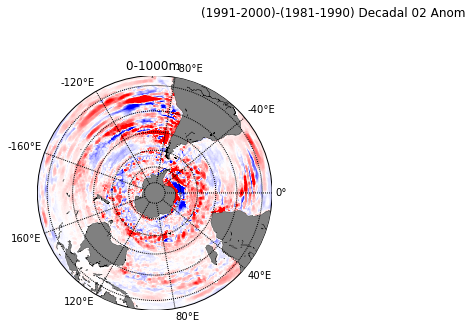

In [5]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal 02 Anom')

clev = np.arange(-5,5.1,.1)
#print clev

cyrs=np.arange(1971,2017,1)
#print cyrs[10:20]
pyrs=np.arange(1973,2017,1)
#print pyrs[8:18]

of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
varC=np.load(of)

print(varC.shape)

of=os.path.join(NYFPertDir,'pO_0to1.npy')
varP=np.load(of)

print(varP.shape)


var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('0-1000m ')

In [16]:
of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
varC=np.load(of)

print(varC.shape)

of=os.path.join(NYFPertDir,'pO_4to6.npy')
varP=np.load(of)

print(varP.shape)


(50, 1080, 1440)
(528, 1080, 1440)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


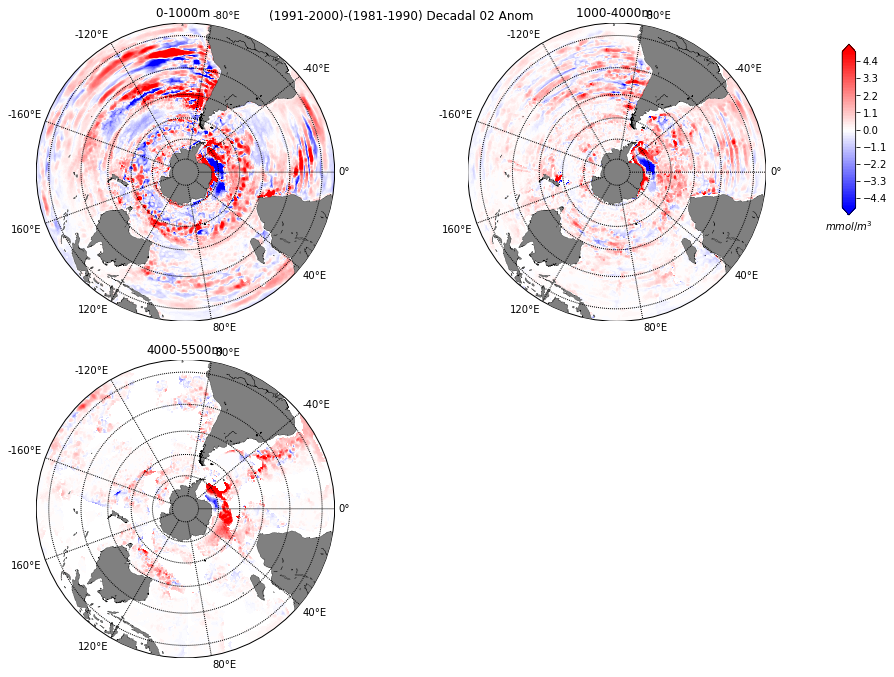

In [4]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal 02 Anom')

clev = np.arange(-5,5.1,.1)
#print clev

cyrs=np.arange(1971,2017,1)
#print cyrs[10:20]
pyrs=np.arange(1973,2017,1)
#print pyrs[8:18]

of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_0to1.npy')
varP=np.load(of)


var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('0-1000m ')

of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_1to4.npy')
varP=np.load(of)

var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1000-4000m ')


ax3 = plt.axes([0.99,0.68,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$mmol/m^3$')


of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_4to6.npy')
varP=np.load(of)

var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()


plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1),cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4000-5500m')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'Oanom_decadal_Eq.png')
#plt.savefig(of,dpi=220)

#ax3 = plt.axes([0.92,0.38,0.015,0.25])

In [5]:
#calc dT/dt
cyrs=np.arange(1971,2017,1)
pyrs=np.arange(1973,2017,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(cyrs[10:30])
print(pyrs[8:28])

print(cyrs[30:46])
print(pyrs[28:44])

nonp_tr81to00_pO=np.zeros((500,1440))
nonp_tr00to17_pO=np.zeros((500,1440))
nonp_tr81to17_pO=np.zeros((500,1440))

nonp_tr81to00_cO=np.zeros((500,1440))
nonp_tr00to17_cO=np.zeros((500,1440))
nonp_tr81to17_cO=np.zeros((500,1440))

of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_0to1.npy')
varP=np.load(of)

for j in range(0,500):
    #print j
    
    nonp_tr81to00_pO[j,:]=np.polyfit(range(20*12), varP[8*12:28*12,j,:],1)[0,:]
    nonp_tr00to17_pO[j,:]=np.polyfit(range(16*12), varP[28*12:44*12,j,:],1)[0,:]
    nonp_tr81to17_pO[j,:]=np.polyfit(range(36*12), varP[8*12:44*12,j,:],1)[0,:]

    nonp_tr81to00_cO[j,:]=np.polyfit(range(20*12), varC[8*12:28*12,j,:],1)[0,:]
    nonp_tr00to17_cO[j,:]=np.polyfit(range(16*12), varC[28*12:44*12,j,:],1)[0,:]
    nonp_tr81to17_cO[j,:]=np.polyfit(range(36*12), varC[8*12:44*12,j,:],1)[0,:]

of=os.path.join(NYFPertDir,'nonp_tr81to00_pO_0to1.npy')
a=np.save(of,nonp_tr81to00_pO)
of=os.path.join(NYFPertDir,'nonp_tr00to17_pO_0to1.npy')
a=np.save(of,nonp_tr00to17_pO)
of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_0to1.npy')
a=np.save(of,nonp_tr81to17_pO)


of=os.path.join(NYFPertDir,'nonp_tr81to00_cO_0to1.npy')
a=np.save(of,nonp_tr81to00_cO)
of=os.path.join(NYFPertDir,'nonp_tr00to17_cO_0to1.npy')
a=np.save(of,nonp_tr00to17_cO)
of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_0to1.npy')
a=np.save(of,nonp_tr81to17_cO)


[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


In [6]:
nonp_tr81to00_pO=np.zeros((500,1440))
nonp_tr00to17_pO=np.zeros((500,1440))
nonp_tr81to17_pO=np.zeros((500,1440))

nonp_tr81to00_cO=np.zeros((500,1440))
nonp_tr00to17_cO=np.zeros((500,1440))
nonp_tr81to17_cO=np.zeros((500,1440))

of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_1to4.npy')
varP=np.load(of)

for j in range(0,500):
    #print j
    
    nonp_tr81to00_pO[j,:]=np.polyfit(range(20*12), varP[8*12:28*12,j,:],1)[0,:]
    nonp_tr00to17_pO[j,:]=np.polyfit(range(16*12), varP[28*12:44*12,j,:],1)[0,:]
    nonp_tr81to17_pO[j,:]=np.polyfit(range(36*12), varP[8*12:44*12,j,:],1)[0,:]

    nonp_tr81to00_cO[j,:]=np.polyfit(range(20*12), varC[8*12:28*12,j,:],1)[0,:]
    nonp_tr00to17_cO[j,:]=np.polyfit(range(16*12), varC[28*12:44*12,j,:],1)[0,:]
    nonp_tr81to17_cO[j,:]=np.polyfit(range(36*12), varC[8*12:44*12,j,:],1)[0,:]

of=os.path.join(NYFPertDir,'nonp_tr81to00_pO_1to4.npy')
a=np.save(of,nonp_tr81to00_pO)
of=os.path.join(NYFPertDir,'nonp_tr00to17_pO_1to4.npy')
a=np.save(of,nonp_tr00to17_pO)
of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_1to4.npy')
a=np.save(of,nonp_tr81to17_pO)

of=os.path.join(NYFPertDir,'nonp_tr81to00_cO_1to4.npy')
a=np.save(of,nonp_tr81to00_cO)
of=os.path.join(NYFPertDir,'nonp_tr00to17_cO_1to4.npy')
a=np.save(of,nonp_tr00to17_cO)
of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_1to4.npy')
a=np.save(of,nonp_tr81to17_cO)


In [7]:
nonp_tr81to00_pO=np.zeros((500,1440))
nonp_tr00to17_pO=np.zeros((500,1440))
nonp_tr81to17_pO=np.zeros((500,1440))

nonp_tr81to00_cO=np.zeros((500,1440))
nonp_tr00to17_cO=np.zeros((500,1440))
nonp_tr81to17_cO=np.zeros((500,1440))

of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_4to6.npy')
varP=np.load(of)

for j in range(0,500):
    #print j
    
    nonp_tr81to00_pO[j,:]=np.polyfit(range(20*12), varP[8*12:28*12,j,:],1)[0,:]
    nonp_tr00to17_pO[j,:]=np.polyfit(range(16*12), varP[28*12:44*12,j,:],1)[0,:]
    nonp_tr81to17_pO[j,:]=np.polyfit(range(36*12), varP[8*12:44*12,j,:],1)[0,:]

    nonp_tr81to00_cO[j,:]=np.polyfit(range(20*12), varC[8*12:28*12,j,:],1)[0,:]
    nonp_tr00to17_cO[j,:]=np.polyfit(range(16*12), varC[28*12:44*12,j,:],1)[0,:]
    nonp_tr81to17_cO[j,:]=np.polyfit(range(36*12), varC[8*12:44*12,j,:],1)[0,:]

of=os.path.join(NYFPertDir,'nonp_tr81to00_pO_4to6.npy')
a=np.save(of,nonp_tr81to00_pO)
of=os.path.join(NYFPertDir,'nonp_tr00to17_pO_4to6.npy')
a=np.save(of,nonp_tr00to17_pO)
of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_4to6.npy')
a=np.save(of,nonp_tr81to17_pO)

of=os.path.join(NYFPertDir,'nonp_tr81to00_cO_4to6.npy')
a=np.save(of,nonp_tr81to00_cO)
of=os.path.join(NYFPertDir,'nonp_tr00to17_cO_4to6.npy')
a=np.save(of,nonp_tr00to17_cO)
of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_4to6.npy')
a=np.save(of,nonp_tr81to17_cO)


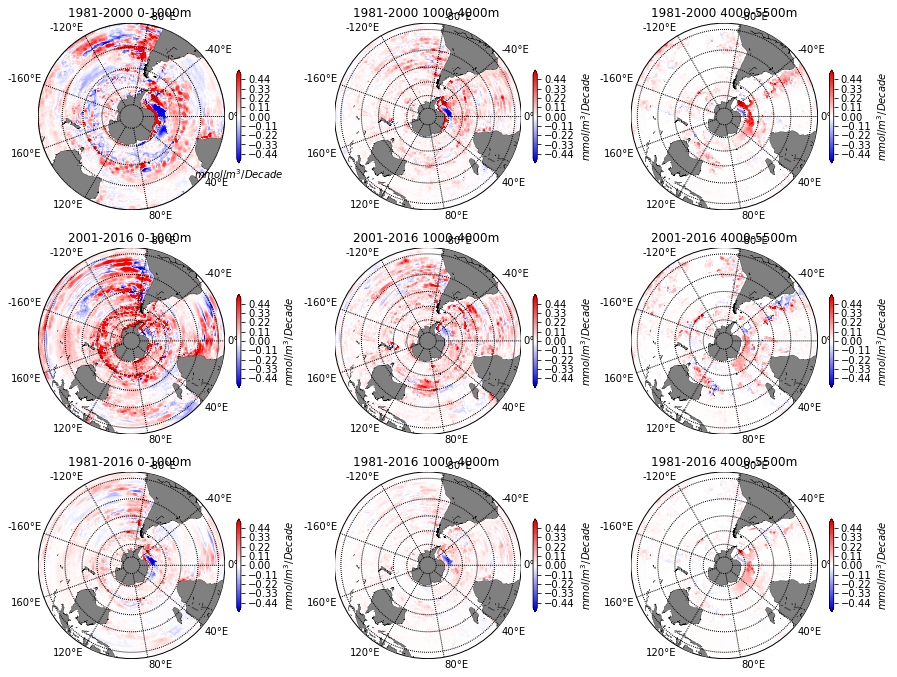

In [8]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

of=os.path.join(NYFPertDir,'nonp_tr81to00_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to00_pO_0to1.npy')
p=np.load(of)

clev = np.arange(-.5,.51,.01)
#print clev

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 0-1000m ')

of=os.path.join(NYFPertDir,'nonp_tr81to00_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to00_pO_1to4.npy')
p=np.load(of)

plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

of=os.path.join(NYFPertDir,'nonp_tr81to00_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to00_pO_4to6.npy')
p=np.load(of)

#clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 4000-5500m')

of=os.path.join(NYFPertDir,'nonp_tr00to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr00to17_pO_0to1.npy')
p=np.load(of)

#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 0-1000m ')

of=os.path.join(NYFPertDir,'nonp_tr00to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr00to17_pO_1to4.npy')
p=np.load(of)

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

of=os.path.join(NYFPertDir,'nonp_tr00to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr00to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')


of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_0to1.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 0-1000m ')


of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_1to4.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

plt.tight_layout()
